In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras import optimizers
import keras.utils as ker
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Dense, InputLayer, Flatten, Dropout
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score, accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.utils import resample

Using TensorFlow backend.


In [2]:
## Read data from csv file 'student-por.csv'
por_data = pd.read_csv('encoded_por_data.csv')

In [3]:
## Encoding Schools 
list_of_schools = []
for i in por_data['school']:
    if i == 'GP':
        school = 1
    else:
        school = 0
    list_of_schools.append(school)

por_data['school'] = list_of_schools

In [4]:
## One-hot encoding binary variables. 
school_one_hot = ker.to_categorical(por_data['school']).tolist()
sex_one_hot = ker.to_categorical(por_data['sex']).tolist()
address_one_hot = ker.to_categorical(por_data['address']).tolist()
pstatus_one_hot = ker.to_categorical(por_data['Pstatus']).tolist()
fedu_one_hot = ker.to_categorical(por_data['Fedu']).tolist()
medu_one_hot = ker.to_categorical(por_data['Medu']).tolist()
schoolsup_one_hot = ker.to_categorical(por_data['schoolsup']).tolist()
famsup_one_hot = ker.to_categorical(por_data['famsup']).tolist()
paid_one_hot = ker.to_categorical(por_data['paid']).tolist()
activities_one_hot = ker.to_categorical(por_data['activities']).tolist()
nursery_one_hot = ker.to_categorical(por_data['nursery']).tolist()
higher_one_hot = ker.to_categorical(por_data['higher']).tolist()
internet_one_hot = ker.to_categorical(por_data['internet']).tolist()
romantic_one_hot = ker.to_categorical(por_data['romantic']).tolist()

## Adding one-hot vectors to df
por_data['school_one_hot'] = school_one_hot
por_data['sex_one_hot'] = sex_one_hot
por_data['address_one_hot'] = address_one_hot
por_data['pstatus_one_hot'] = pstatus_one_hot
por_data['fedu_one_hot'] = fedu_one_hot
por_data['medu_one_hot'] = medu_one_hot
por_data['schoolsup_one_hot'] = schoolsup_one_hot
por_data['famsup_one_hot'] = famsup_one_hot
por_data['paid_one_hot'] = paid_one_hot
por_data['activities_one_hot'] = activities_one_hot
por_data['nursery_one_hot'] = nursery_one_hot
por_data['higher_one_hot'] = higher_one_hot
por_data['internet_one_hot'] = internet_one_hot
por_data['romantic_one_hot'] = romantic_one_hot

In [5]:
# Creating a new binary variable - 1 if student failed first grading period
previous_grade_list = []
for i in por_data['P1']:
    if i < 9.5: # Fail
        label = 1
    else: # Pass
        label = 0
    previous_grade_list.append(label)
por_data['previous_pass_fail'] = previous_grade_list

In [6]:
## Creating labels - Pass(0) or Fail(1)
list_of_labels = []
for i in por_data['P3']:
    if i < 9.5: # Fail
        label = 1
    else: # Pass
        label = 0
    list_of_labels.append(label)
por_data['label'] = list_of_labels

In [7]:
por_data['label'].value_counts()

0    549
1    100
Name: label, dtype: int64

In [8]:
## Upsample the minority class to deal with the skewed dataset. 
por_data_maj = por_data[por_data['label']==0]
por_data_min = por_data[por_data['label']==1]
por_data_min_upsampled = resample(por_data_min, replace=True, n_samples=549)    
por_data_balanced = pd.concat([por_data_maj, por_data_min_upsampled])
por_data_balanced['label'].value_counts()

1    549
0    549
Name: label, dtype: int64

In [9]:
por_data_balanced = por_data_balanced.reset_index(drop=True)
balanced_por_data = por_data_balanced.drop(por_data_balanced.columns[[0]], axis=1)

In [10]:
## Creating input vector (X)
X = []
for i in range(0, len(balanced_por_data)):
    x = []
#    x.append(balanced_por_data['age'][i])
    x.append(balanced_por_data['Medu'][i])
    x.append(balanced_por_data['Fedu'][i])
#    x.append(balanced_por_data['both_parents_college'][i])
#    x.append(balanced_por_data['studytime'][i])
#    x.append(balanced_por_data['famrel'][i])
#    x.append(balanced_por_data['freetime'][i])
    x.append(balanced_por_data['goout'][i])
    x.append(balanced_por_data['Dalc'][i])
    x.append(balanced_por_data['Walc'][i])
#    x.append(balanced_por_data['health'][i])
#    x.append(balanced_por_data['m_absences'][i])
    x.append(balanced_por_data['failures'][i])
    
#    x.extend(balanced_por_data['sex_one_hot'][i])
#    x.extend(balanced_por_data['address_one_hot'][i])
#    x.extend(balanced_por_data['pstatus_one_hot'][i])
#    x.extend(balanced_por_data['schoolsup_one_hot'][i])
#    x.extend(balanced_por_data['famsup_one_hot'][i])
    x.extend(balanced_por_data['paid_one_hot'][i])
#    x.extend(balanced_por_data['activities_one_hot'][i])
#    x.extend(balanced_por_data['nursery_one_hot'][i])
#    x.extend(balanced_por_data['school_one_hot'][i])
    x.extend(balanced_por_data['higher_one_hot'][i])
    x.extend(balanced_por_data['internet_one_hot'][i])
    x.extend(balanced_por_data['romantic_one_hot'][i])
    x.append(balanced_por_data['previous_pass_fail'][i])
    x.append(balanced_por_data['P1'][i])
    X.append(x)

In [11]:
Y = np.array(balanced_por_data['label'])
X = np.array(X)

In [41]:
## split dataset into train-test.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, stratify=Y)

In [22]:
## DNN model utilizing TF's Keras API
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=X.shape[1:]))
model.add(keras.layers.Dense(128, activation='sigmoid'))
model.add(keras.layers.Dense(128, activation='sigmoid'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy')
model.summary()
model.fit(X_train, y_train, epochs=36, batch_size=1, validation_split=0.2)
Y_pred = model.predict_classes(X_test)

## Metrics - 
print('\nPrecision score: {:.4f}'.format(precision_score(y_test, Y_pred)))
print('Recall score: {:.4f}'.format(recall_score(y_test, Y_pred)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, Y_pred)))
print('F1 score: {:.4f}'.format(f1_score(y_test, Y_pred)))

print('\nClassification accuracy report:')
print(classification_report(y_test, Y_pred))
print('\nConfusion matrix:')
print(confusion_matrix(y_test, Y_pred))

## Creating an ROC/AUC curve to visualize performance. 
classification_probs = model.predict_proba(X_test)
classification_AUC = roc_auc_score(y_test, classification_probs)  
print("\nAUC Index: {:.3f}".format(classification_AUC))
fpr, tpr, threshold = roc_curve(y_test,  classification_probs)
plt.plot(fpr,tpr,label="auc="+str(classification_AUC))
plt.legend(loc=5)
plt.ylabel('Recall')
plt.xlabel('1-specificity')
plt.title('ROC Curve')
plt.show()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               2176      
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 18,817
Trainable params: 18,817
Non-trainable params: 0
_________________________________________________________________
Train on 658 samples, validate on 165 samples
Epoch 1/36
658/658 [==============================] - 1s 2ms/sample - loss: 0.4472 - val_loss: 0.3657
Epoch 2/36
658/658 [==============================] - 1s 2ms/sample - loss: 0.3166 - val_loss: 0.3488
Epoch 3/36
 53/658 [=>............................] - ETA: 1s - loss: 0.2759

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-22-ce763311a399>", line 10, in <module>
    model.fit(X_train, y_train, epochs=36, batch_size=1, validation_split=0.2)
  File "/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/training.py", line 703, in fit
    use_multiprocessing=use_multiprocessing)
  File "/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/training_arrays.py", line 669, in fit
    steps_name='steps_per_epoch')
  File "/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/training_arrays.py", line 388, in model_iteration
    batch_outs = f(ins_batch)
  File "/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/keras/backend.py", line 3356, in __call__
    return nest.map_structure(self._eval_if_composite, output_structure)
  

KeyboardInterrupt: 

Best Parameters: {'max_depth': 1, 'max_leaf_nodes': 2, 'min_samples_split': 2}

Precision score: 0.8667
Recall score: 0.8540
Accuracy score: 0.8618
F1 score: 0.8603

AUC Index: 0.8617899079657252


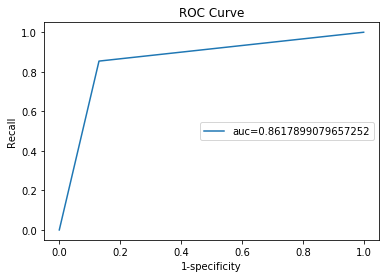

In [23]:
## Tuning hyperparameters of tree - cross-validated grid-search over a parameter grid.
optimized_tree = DecisionTreeClassifier()
params = {"max_depth": range(1,10),
           "min_samples_split": range(2,10,1),
           "max_leaf_nodes": range(2,5)}

opt_tree = GridSearchCV(optimized_tree, params, cv=5) ##  folds in stratified k-fold. 
opt_tree.fit(X_train,y_train)
print("Best Parameters:", opt_tree.best_params_)

## Grid Search Tree Metrics
grid_tree_y_pred = opt_tree.predict(X_test)
grid_tree_probs = opt_tree.predict_proba(X_test)
grid_tree_AUC = roc_auc_score(y_test, grid_tree_probs[:, 1])  ## Probability here just like lecture notes.

print('\nPrecision score: {:.4f}'.format(precision_score(y_test, grid_tree_y_pred)))
print('Recall score: {:.4f}'.format(recall_score(y_test, grid_tree_y_pred)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, grid_tree_y_pred)))
print('F1 score: {:.4f}'.format(f1_score(y_test, grid_tree_y_pred)))

print("\nAUC Index:", grid_tree_AUC)
fpr, tpr, threshold = roc_curve(y_test,  grid_tree_probs[:, 1])
plt.plot(fpr,tpr,label="auc="+str(grid_tree_AUC))
plt.legend(loc=5)
plt.ylabel('Recall')
plt.xlabel('1-specificity')
plt.title('ROC Curve')
plt.show() 

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best Parameters: {'max_depth': 3, 'max_leaf_nodes': 3, 'min_samples_split': 4}
Precision score: 0.8429
Recall score: 0.8551
Accuracy score: 0.8473
F1 score: 0.8489

AUC Index: 0.9121707394477944


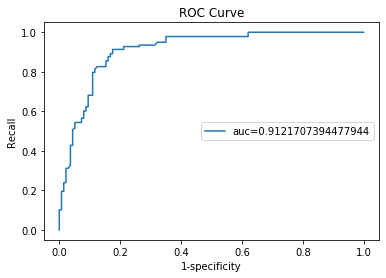

In [32]:
## Random Forest - cross-validated grid-search over a parameter grid.
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, bootstrap=True)
params = {"max_depth": range(1,10),
           "min_samples_split": range(2,10,1),
           "max_leaf_nodes": range(2,5)}

opt_rf = GridSearchCV(rf, params)
opt_rf.fit(X_train,y_train)
print("Best Parameters:", opt_rf.best_params_)

rf_y_pred = opt_rf.predict(X_test)
rf_probs = opt_rf.predict_proba(X_test)

## Metrics
print('Precision score: {:.4f}'.format(precision_score(y_test,rf_y_pred)))
print('Recall score: {:.4f}'.format(recall_score(y_test,rf_y_pred)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test,rf_y_pred)))
print('F1 score: {:.4f}'.format(f1_score(y_test,rf_y_pred)))

rf_AUC = roc_auc_score(y_test, rf_probs[:, 1])  
print("\nAUC Index:", rf_AUC)
fpr, tpr, threshold = roc_curve(y_test,  rf_probs[:, 1])  
plt.plot(fpr,tpr,label="auc="+str(rf_AUC))
plt.legend(loc=5)
plt.ylabel('Recall')
plt.xlabel('1-specificity')
plt.title('ROC Curve')
plt.show()

Precision score: 0.8873
Recall score: 0.9130
Accuracy score: 0.8982
F1 score: 0.9000

AUC Index: 0.9636094361578333


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


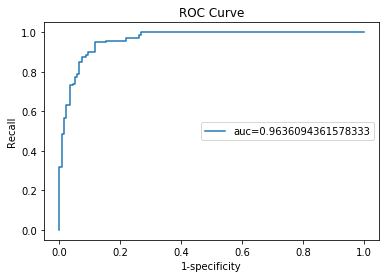

In [42]:
## Logistic Regression
log_regression = LogisticRegression().fit(X_train, y_train)
logistic_y_pred = log_regression.predict(X_test)
log_probs = log_regression.predict_proba(X_test)

## Metrics
print('Precision score: {:.4f}'.format(precision_score(y_test,logistic_y_pred)))
print('Recall score: {:.4f}'.format(recall_score(y_test,logistic_y_pred)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test,logistic_y_pred)))
print('F1 score: {:.4f}'.format(f1_score(y_test,logistic_y_pred)))

log_AUC = roc_auc_score(y_test, log_probs[:, 1])
print("\nAUC Index:", log_AUC)
fpr, tpr, threshold = roc_curve(y_test,  log_probs[:, 1])
plt.plot(fpr,tpr,label="auc="+str(log_AUC))
plt.legend(loc=5)
plt.ylabel('Recall')
plt.xlabel('1-specificity')
plt.title('ROC Curve')
plt.show()